# Happiness and alcohol consumption dataset 

In [1]:
import pandas as pd
Hap_alc = pd.read_csv('HappinessAlcoholConsumption.csv')
Hap_alc.shape
Hap_alc.head(n=20)

#Summary stats 
Hap_alc.describe().round(2)

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.00,122.00,122.00,122.00,122.00,122.00
mean,5.52,740.88,91.48,137.57,96.60,66.60
std,1.15,149.85,209.58,104.82,81.44,88.12
min,3.07,351.00,1.03,1.00,1.00,1.00
25%,4.53,663.75,4.13,38.25,25.50,5.00
50%,5.54,757.50,12.02,125.50,82.50,16.00
75%,6.48,861.50,41.99,224.75,142.50,112.75
max,7.53,951.00,953.00,376.00,373.00,370.00


# Data visualisation

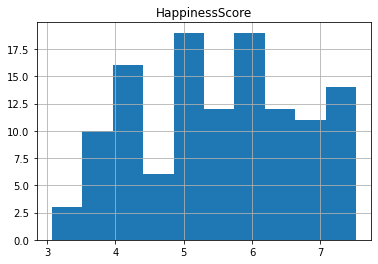

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234DFEDEF40>]],
      dtype=object)

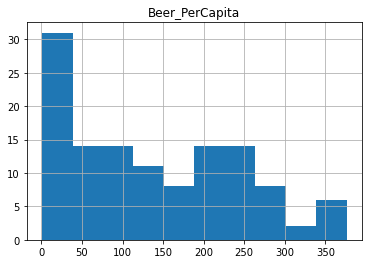

In [2]:
import matplotlib.pyplot as plt

Hap_alc.hist(column = 'HappinessScore')
plt.show()

Hap_alc.hist(column = 'Beer_PerCapita') #only 5 countries that drink 350 litres of beer per average person. 

# Correlation matrix 

In [3]:
corr_matrix = Hap_alc.corr().round(2)
print(corr_matrix)

                  HappinessScore   HDI  GDP_PerCapita  Beer_PerCapita  \
HappinessScore              1.00  0.82          -0.45            0.49   
HDI                         0.82  1.00          -0.57            0.59   
GDP_PerCapita              -0.45 -0.57           1.00           -0.37   
Beer_PerCapita              0.49  0.59          -0.37            1.00   
Spirit_PerCapita            0.26  0.39          -0.26            0.36   
Wine_PerCapita              0.45  0.60          -0.20            0.47   

                  Spirit_PerCapita  Wine_PerCapita  
HappinessScore                0.26            0.45  
HDI                           0.39            0.60  
GDP_PerCapita                -0.26           -0.20  
Beer_PerCapita                0.36            0.47  
Spirit_PerCapita              1.00            0.12  
Wine_PerCapita                0.12            1.00  


# Data preparation - feature selection

(122, 1)
(122,)


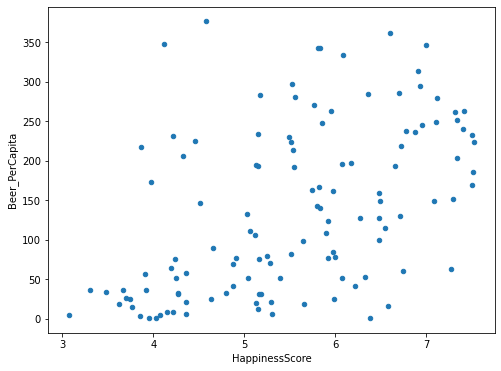

In [4]:
Hap_alc.plot(kind = 'scatter',
            x = 'HappinessScore',
            y = 'Beer_PerCapita',
            figsize = (8,6))

#Going to fit a simple linear regression on Happiness score and beer per capita 

X = Hap_alc[['HappinessScore']]
Y = Hap_alc['Beer_PerCapita']

print(X.shape)
print(Y.shape)

# Fitting a univariate linear regression

## Instantiating a model 

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #instance of class LinearRegression 



# Train-test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size = 0.3,
                                                   random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)




(85, 1)
(37, 1)
(85,)
(37,)


# Fitting the model and parameter estimates 

In [7]:
model.fit(X_train, Y_train)
print(model.intercept_.round(2))
model.coef_.round(2)



-119.76


array([45.74])

# Prediction 

In [8]:
import numpy as np

#Going to predict value when happiness score is 5

Hap_score = np.array([5]).reshape(-1,1)
print(Hap_score)
print(model.predict(Hap_score))

print(model.intercept_ + model.coef_* Hap_score) #same value

#Testing set 

y_test_predicted = model.predict(X_test) #predicting the labels for the test set
y_test_predicted.shape
print(y_test_predicted) #shows predicted values for each data point
Y_test.shape

[[5]]
[108.96048554]
[[108.96048554]]
[149.99361844  57.08582255 116.41689654  68.75076    152.69256475
 176.38839846 122.82117592 151.0914949   75.84121217 110.47006568
  56.62837402 171.2192301   74.7433357   51.27622626  70.35182984
  39.61128881 223.36836221  92.2636143   62.02626665 147.15743757
 131.28397367 114.86157154 114.49561272 196.19591969 103.24237895
 145.64785743 167.01070365 121.72329945  93.17851135  75.65823276
 115.59348919 154.11065518  74.01141806 144.09253244 146.15105081
 153.6074618  133.11376778]


(37,)

# Evaluating the model

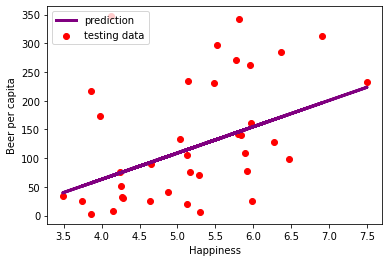

In [9]:
#Residuals 
plt.scatter(X_test, Y_test, label = 'testing data', color = 'red');
plt.plot(X_test, y_test_predicted,
        label = 'prediction', linewidth = 3, color = 'purple')
plt.xlabel('Happiness')
plt.ylabel('Beer per capita')
plt.legend(loc = 'upper left')
plt.show()

# Calculating residuals 

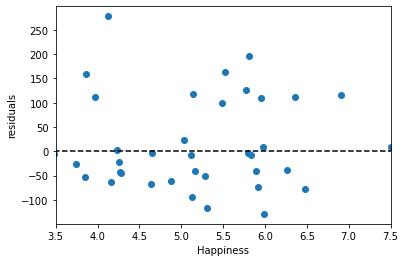

In [10]:
residuals = Y_test - y_test_predicted
#Plotting residuals 

plt.scatter(X_test, residuals)
#plot horizontal line at y = 0

plt.hlines(y = 0, 
          xmin = X_test.min(),
          xmax = X_test.max(),
           linestyle = '--')
#set xlim
plt.xlim(3.5,7.5)
plt.xlabel('Happiness')
plt.ylabel('residuals')
plt.show()

#Indicates model is doing okay
# we want residuals to show no clear pattern, be scattered around the horizontal line of y = 0


           

## Mean squared error 

In [11]:
residuals.mean() #not good estimate because residuals will cancel each other. 

#MSE 
(residuals**2).mean()

#or import function from module

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_test, y_test_predicted)
print(MSE)

from math import sqrt

print(sqrt(MSE)) #took square root to get RMSE which scales it to the dependent variable. RMSE is the overall difference between actual values and predicted values


9143.053116058281
95.61931350965808


## R-squared 

In [12]:
model.score(X_test, Y_test) #this indicates the model is explaining 16% of total variance in the test set

#total variation 

total_var = ((Y_test - Y_test.mean())**2).sum() #sum of squares of the difference between the response and mean of response

fail_var = (residuals**2).sum() #variation the model fails to capture, sum of squares of residuals

#proportion of total variance from data is calculated by

1 - fail_var/total_var # a perfect model would explain all the variability in the data, here it explains 16%



0.1677111880355947

# Multiple linear regression

In [13]:
#Adding a new variable wine to the model 

X2 = Hap_alc[['HappinessScore', 'Wine_PerCapita']]
Y = Hap_alc['Beer_PerCapita']

print(X2.shape) 
print(Y.shape)

X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y,
                                                     test_size = 0.3,
                                                     random_state = 1)
model2 = LinearRegression()

print(model2.fit(X2_train, Y_train))

(122, 2)
(122,)
LinearRegression()


In [14]:
print(model2.coef_)
print(model2.intercept_)

#the model is Beer_percapita = -77.735 + 34.987* HappinessScore + 0.269 * Wine_PerCapita

y_test_predicted2 = model2.predict(X2_test)

MSE2 = mean_squared_error(Y_test, y_test_predicted2).round(2) 
print(MSE2)
sqrt(MSE2)

#Note: model2 with wine added had lower MSE than first model 9143 indicating the addition of wine helped predict beer per capita

[34.98793266  0.26927923]
-77.73551304875781
7524.44


86.74353001809415

#  R-squared

In [15]:
residuals2 = Y_test - y_test_predicted2

model2.score(X2_test, Y_test) 

#total variation 
total_var = ((Y_test - Y_test.mean())**2).sum() #sum of squares of the difference between the response and mean of response

fail_var = (residuals2**2).sum() #variation the model fails to capture, sum of squares of residuals

#proportion of total variance from data is calculated by

1 - fail_var/total_var # a perfect model would explain all the variability in the data, here it explains 32%


0.3150530561096885